In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn
import math

In [12]:
mean1=[0,0]
cov1=[[1,0],[0,1]]
mean2=[1,1]
cov2=[[1,1],[1,1]]
class1=np.random.multivariate_normal(mean1,cov1,100).T
class2=np.random.multivariate_normal(mean2,cov2,100).T
data_x=np.concatenate((class1[0],class2[0]),axis=0)
train_x=data_x[0:160]
test_x=data_x[160:200]
data_y=np.concatenate((class1[1],class2[1]),axis=0)
train_y=data_y[0:160]
test_y=data_y[160:200]
train_lab=np.array([0]*100+[1]*60)
test_lab=np.array([1]*40)

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
w1,w2,w3,w4,w5,w6=1,1,1,1,1,1

In [15]:
def train_loss(we1,we2,we3,we4,we5,we6):
    J=0
    for i in range(0,160):
        sig_in1=w1*train_x[i]+w3*train_y[i]
        sig_in2=w2*train_x[i]+w4*train_y[i]
        J=J+train_lab[i]-sigmoid(w5*np.tanh(sig_in1)+w6*np.tanh(sig_in2))+0.1*(we1**1+we2**2+we3**2+we4**2+we5**2+we6**2)
    return J**2

In [16]:
def diff(x1,x2,y,we1,we2,we3,we4,we5,we6):
    sig_in1=we1*x1+we3*x2
    sig_in2=we2*x1+we4*x2
    z=we5*np.tanh(sig_in1)+we6*np.tanh(sig_in2)
    temp=2*(y-sigmoid(z))*-1*(sigmoid(z))*(1-sigmoid(z))
    diff_w1=temp*w5*(1-np.tanh(sig_in1)**2)*x1+0.1*2*w1
    diff_w2=temp*w6*(1-np.tanh(sig_in2)**2)*x1+0.1*2*w2
    diff_w3=temp*w5*(1-np.tanh(sig_in1)**2)*x2+0.1*2*w3
    diff_w4=temp*w6*(1-np.tanh(sig_in2)**2)*x2+0.1*2*w4
    diff_w5=temp*np.tanh(sig_in1)+2*w5*0.1
    diff_w6=temp*np.tanh(sig_in2)+2*w6*0.1
    return [diff_w1,diff_w2,diff_w3,diff_w4,diff_w5,diff_w6]

In [17]:
def train_diff(we1,we2,we3,we4,we5,we6):
    a=np.array([0,0,0,0,0,0])
    for j in range(0,160):
        b=np.array(diff(train_x[j],train_y[j],train_lab[j],we1,we2,we3,we4,we5,we6))
        a=a+b
    return a

In [18]:
def backpropogate(we1,we2,we3,we4,we5,we6):
    temp_arr=np.array(train_diff(we1,we2,we3,we4,we5,we6))
    diff_arr=np.array([we1,we2,we3,we4,we5,we6])
    diff_arr=diff_arr-0.01*temp_arr
    we1,we2,we3,we4,we5,we6=diff_arr.tolist()
    loss_update=train_loss(we1,we2,we3,we4,we5,we6)
    return ([loss_update,we1,we2,we3,we4,we5,we6])

In [19]:
list1=list()
list2=list()
list1.append(train_loss(w1,w2,w3,w4,w5,w6))
list2.append(0)
iterat=1

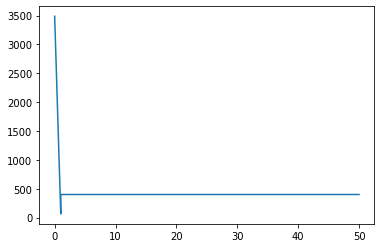

In [21]:
for i in range(1,51):
    update=backpropogate(w1,w2,w3,w4,w5,w6)
    loss=update[0]
    list1.append(loss)
    list2.append(i)
    w1,w2,w3,w4,w5,w6=update[1:7]
plt.plot(list2,list1)
plt.show()